# Bài tập thực hành 1

## 1. Chọn số chiều chính, đưa tập dự liệu về 2 chiều và hiển thị

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

### Nhập dữ liệu

In [106]:
df= pd.read_csv("pd_speech_features.csv")
df.head()
df['class'].value_counts()

class
1    564
0    192
Name: count, dtype: int64

### Chuẩn hóa dữ liệu

In [107]:
y = df['class']
X = df.drop(columns=['class'])
X = (X - X.mean()) / X.std(ddof=0)

### Ma trận tương quan

In [108]:
X_corr = (1 / len(X)) * X.T.dot(X)

### SVD -> trị riêng và vector riêng

In [109]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s,u
eig_values, eig_vectors
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([ 9.76090523e+01+0.00000000e+00j,  7.07071439e+01+0.00000000e+00j,
        6.21441000e+01+0.00000000e+00j,  3.23118826e+01+0.00000000e+00j,
        2.68688989e+01+0.00000000e+00j,  2.25628552e+01+0.00000000e+00j,
        1.89121899e+01+0.00000000e+00j,  1.66769889e+01+0.00000000e+00j,
        1.53272707e+01+0.00000000e+00j,  1.37376425e+01+0.00000000e+00j,
        1.33072526e+01+0.00000000e+00j,  1.12592929e+01+0.00000000e+00j,
        9.84085806e+00+0.00000000e+00j,  9.55695111e+00+0.00000000e+00j,
        9.58517032e+00+0.00000000e+00j,  8.79335497e+00+0.00000000e+00j,
        8.05084125e+00+0.00000000e+00j,  7.96955688e+00+0.00000000e+00j,
        7.15109717e+00+0.00000000e+00j,  7.04536546e+00+0.00000000e+00j,
        6.53302615e+00+0.00000000e+00j,  6.07308253e+00+0.00000000e+00j,
        5.74473894e+00+0.00000000e+00j,  5.56959532e+00+0.00000000e+00j,
        5.03332009e+00+0.00000000e+00j,  4.72730859e+00+0.00000000e+00j,
        4.69781878e+00+0.0000

### Mức độ quan trọng của các trường

Text(0.5, 0, 'Dimensions')

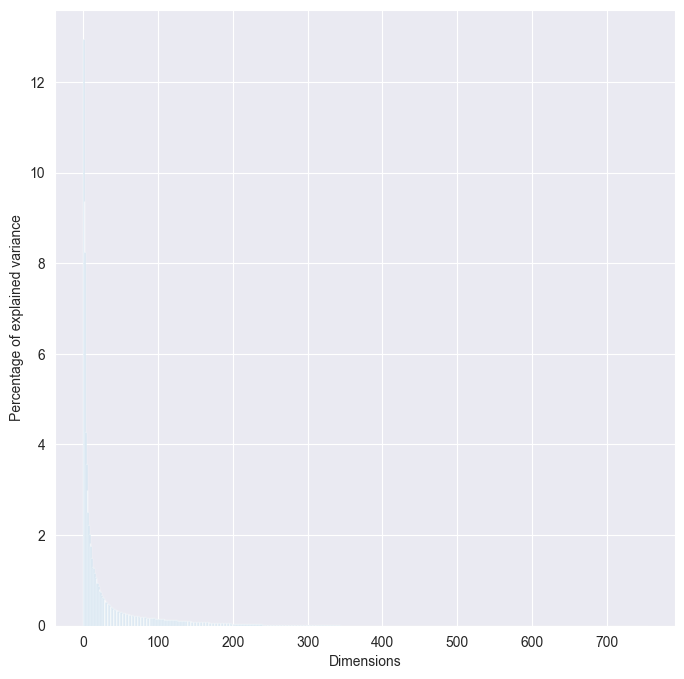

In [110]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,8))
plt.bar(range(754), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

### Chiếu dữ liệu X xuống không gian con 2 chiều tương ứng với 2 giá trị riêng lớn nhất

In [111]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

### Vẽ dữ liệu trong không gian 2 chiều mới thành lập để quan sa

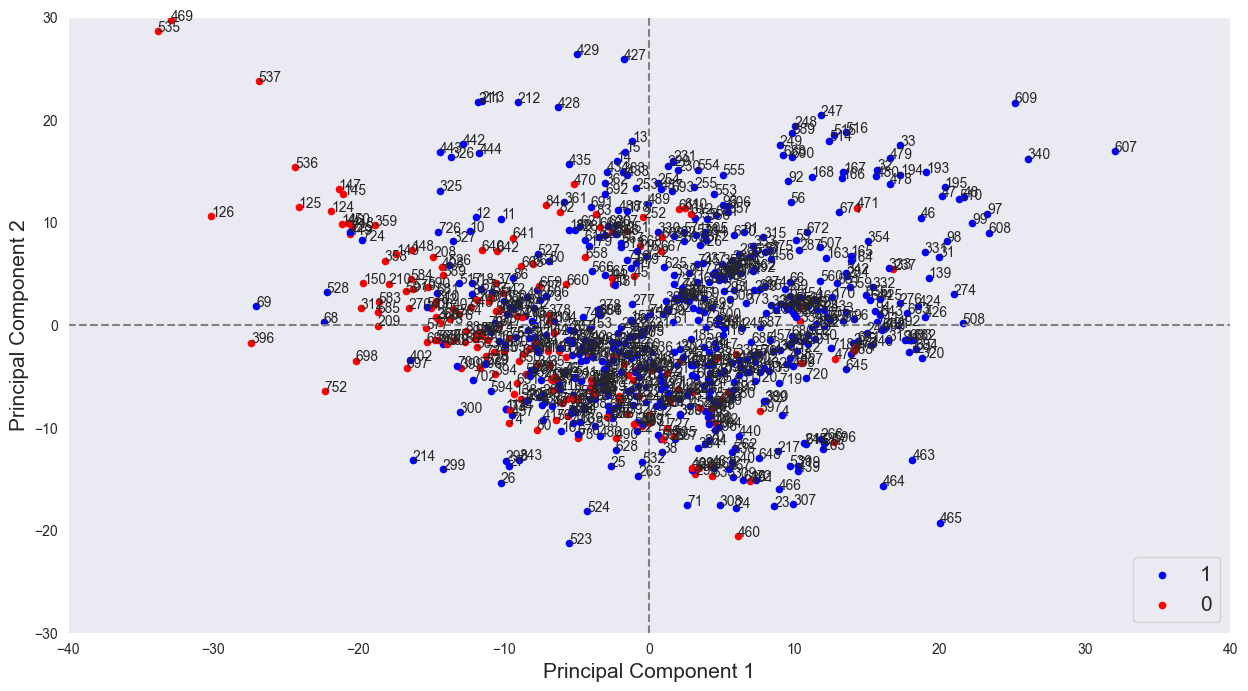

In [112]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    species_unique = list(set(y))
    species_colors = ["r","b"]
    for i, spec in enumerate(y):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-40, 40, -30, 30])
    plt.show()
plot_scatter(pc1, pc2)

## 2. Giảm số chiều xuống còn 200 ứng với thành phần chính, thực hiện train test trên tập

In [73]:
u, s ,v = np.linalg.svd(X, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.71647646e+02, 2.31202510e+02, 2.16750870e+02, 1.56293900e+02,
        1.42523288e+02, 1.30604435e+02, 1.19572637e+02, 1.12284476e+02,
        1.07644864e+02, 1.01910047e+02, 1.00300962e+02, 9.22606384e+01,
        8.62536300e+01, 8.51257233e+01, 8.50003237e+01, 8.15338970e+01,
        7.80156137e+01, 7.76207769e+01, 7.35270662e+01, 7.29814791e+01,
        7.02777900e+01, 6.77587662e+01, 6.59016133e+01, 6.48892446e+01,
        6.16862220e+01, 5.97816468e+01, 5.95948907e+01, 5.88756339e+01,
        5.78112235e+01, 5.64373710e+01, 5.47755077e+01, 5.45449283e+01,
        5.33058252e+01, 5.23924398e+01, 5.17168832e+01, 5.10600423e+01,
        5.01444606e+01, 4.86611285e+01, 4.79261185e+01, 4.65784756e+01,
        4.63741887e+01, 4.58497833e+01, 4.53234431e+01, 4.46911681e+01,
        4.44108034e+01, 4.41208997e+01, 4.37427708e+01, 4.23703716e+01,
        4.22177461e+01, 4.17525796e+01, 4.12856643e+01, 4.11381511e+01,
        4.07686638e+01, 4.02843309e+01, 4.01758445e+01, 3.977625

In [113]:
k = 200
X = np.dot(X, v.T[:, :k])
print(X.shape)

(756, 200)


### Chia Train/Test

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42, stratify=y)

### Huấn luyện mô hình

In [115]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Đánh giá mô hình

In [116]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.80859375


## 3. Chia dữ liệu thành tập Train/Test, sau đó giảm chiều 200 cho cả hai tập bằng PCA

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42, stratify=y)

### Hạ chiều cho X_train

In [118]:
u, s ,v = np.linalg.svd(X_train, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 200
X_train = np.dot(X_train, v.T[:, :k])
print(X_train.shape)

(500, 200)


### Hạ chiều cho X_test

In [119]:
u, s ,v = np.linalg.svd(X_test, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 200
X_test = np.dot(X_test, v.T[:, :k])
print(X_test.shape)

(256, 200)


### Huấn luyện mô hình

In [120]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [121]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.71875


## 4. Đưa dữ liệu về số chiều nhỏ nhất, lượng thông tin được giữ lại đạt 80%

In [151]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
np.random.seed(42)
warnings.filterwarnings('ignore')

### Nhập và chuẩn hóa dữ liệu

In [184]:
df = pd.read_csv("pd_speech_features.csv")
y = df['class']
X = df.drop(columns=['class'])

# Chuẩn hóa dữ liệu
X = (X - X.mean()) / X.std(ddof=0)

### Thực hiện SVD trên toàn tập

In [183]:
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

In [195]:
var_explained = (S**2) / np.sum(S**2)
cum_var_explained = np.cumsum(var_explained)
k_80 = np.argmax(cum_var_explained >= 0.80) + 1
print(f"Số chiều cần giữ lại để đạt >= 80% thông tin: {k_80}")

Số chiều cần giữ lại để đạt >= 80% thông tin: 17


### Chia train/test

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=500, random_state=42, stratify=y)

### Hạ chiều X_train, X_test

In [196]:
u, s ,v = np.linalg.svd(X_train, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 17
X_train = np.dot(X_train, v.T[:, :k])
print(X_train.shape)

(500, 17)


In [197]:
u, s ,v = np.linalg.svd(X_test, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 17
X_test = np.dot(X_test, v.T[:, :k])
print(X_test.shape)

(256, 17)


### Huấn luyện mô hình

In [198]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [199]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7421875


## 5.Chia Train/Test rồi hạ chiều như ý 4 rồi sử dụng Naive Bayes bà Logistic Regression

In [209]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

### Nhập dữ liệu và chuẩn hóa

In [230]:
df = pd.read_csv("pd_speech_features.csv")
y = df['class']
X = df.drop(columns=['class'])
# Chuẩn hóa dữ liệu
X = (X - X.mean()) / X.std(ddof=0)

### Chia Train/Test

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=504, random_state=42, stratify=y)

### Train mô hình Naive Bayes

In [232]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes:")
print("Accuracy:", round(acc_nb, 4))

Naïve Bayes:
Accuracy: 0.7659


### Train mô hình Logistic Regression

In [233]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression:")
print("Accuracy:", round(acc_log, 4))

Logistic Regression:
Accuracy: 0.8373


### Hạ chiều X_train, X_Test xuống 17

In [234]:
u, s ,v = np.linalg.svd(X_train)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 17
X_train = np.dot(X_train, v.T[:, :k])
print(X_train.shape)

(504, 17)


In [235]:
u, s ,v = np.linalg.svd(X_test, full_matrices=False)
eig_values, eig_vectors = s, u
eig_values, eig_vectors
k = 17
X_test = np.dot(X_test, v.T[:, :k])
print(X_test.shape)

(252, 17)


### Huấn luyện mô hình sau khi hạ chiều

In [243]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes:")
print("Accuracy:", round(acc_nb, 4))

Naïve Bayes:
Accuracy: 0.6825


In [242]:
log_reg = LogisticRegression(max_iter=2000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression:")
print("Accuracy:", round(acc_log, 4))

Logistic Regression:
Accuracy: 0.6349


# Bài tập tự thực hành 2

In [295]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from matplotlib import cm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings('ignore')

### Nhập dữ liệu

In [285]:
with open('vidu4_lin_reg.txt') as f:
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(' ')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    y_data.append(splitted[5])
    x_data.append(splitted[:5])

X = np.asarray(x_data)
y = np.asarray(y_data)

### Chuẩn hóa dữ liệu

In [286]:
X = (X - X.mean()) / X.std(ddof=0)

### Tìm ma trận phương sai hiệp, tính svd

In [287]:
X_corr = (1 / len(X)) * X.T.dot(X)

In [288]:
u,s,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = s,u
eig_values, eig_vectors
np.linalg.eig(X_corr)

EigResult(eigenvalues=array([4.85270028e+00, 9.15746560e-02, 4.83164088e-02, 5.18859736e-03,
       2.22005780e-03]), eigenvectors=array([[-0.1301618 ,  0.96096607, -0.24267314, -0.0260139 ,  0.00592769],
       [ 0.21655562, -0.06926527, -0.32940008, -0.70327909, -0.58753732],
       [-0.82555392, -0.24093106, -0.50981541, -0.00886568,  0.02055715],
       [ 0.34994023, -0.07326768, -0.5575334 ,  0.66477979, -0.34554018],
       [ 0.36354384, -0.09127211, -0.51171291, -0.25042171,  0.73139876]]))

Text(0.5, 0, 'Dimensions')

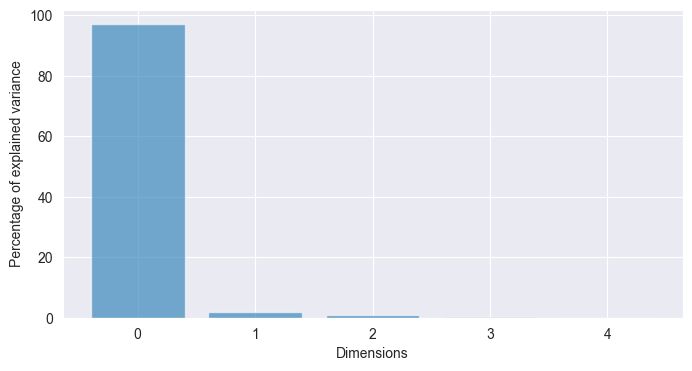

In [289]:
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(5), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

### Chiếu xuống 2 chiều 0 và 1

In [290]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

### Trực quan hóa dữ liệu theo chiều 0 và 1

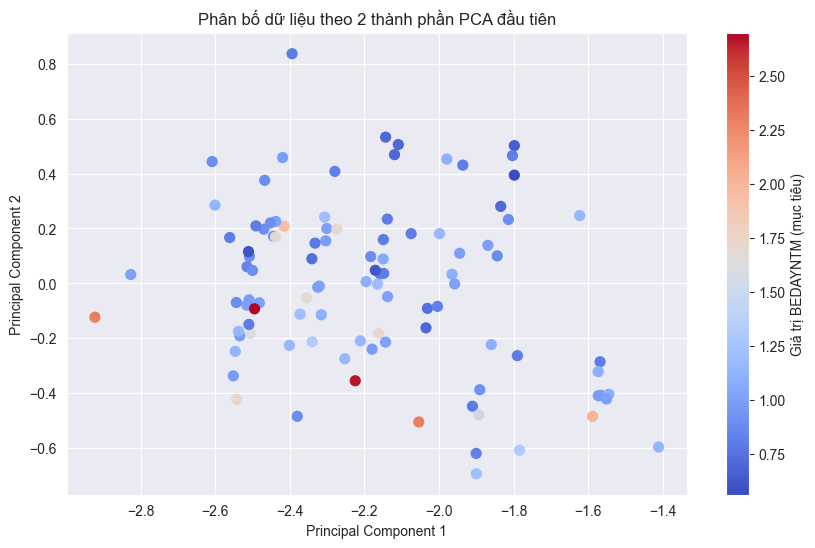

In [297]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(pc1, pc2, c=y, cmap=cm.coolwarm, s=50)
plt.colorbar(scatter, label='Giá trị BEDAYNTM (mục tiêu)')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Phân bố dữ liệu theo 2 thành phần PCA đầu tiên")
plt.grid(True)
plt.show()

### Xử lí dũ liệu mới theo pc1 và pc2, chia train/test và chạy trên Model Linear Regression đưa ra các thông số

In [292]:
X_pca2 = np.column_stack((pc1, pc2))

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca2, y, test_size=0.2, random_state=42)

In [296]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Hồi quy tuyến tính với PC1 & PC2")
print("Hệ số hồi quy:", model.coef_)
print("Intercept:", model.intercept_)
print("R² score:", round(r2_score(Y_test, Y_pred), 4))
print("MAE:", round(mean_absolute_error(Y_test, Y_pred), 4))
print("MSE:", round(mean_squared_error(Y_test, Y_pred), 4))

Hồi quy tuyến tính với PC1 & PC2
Hệ số hồi quy: [-0.26362711 -0.46120254]
Intercept: 0.4674768332030861
R² score: 0.1926
MAE: 0.2594
MSE: 0.1877


# Bài tập tự thực hành 3

In [1]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = ''
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [2]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)

    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

## 1. Lấy 5000 ảnh bất kỳ, giảm số chiều dữ liệu xuống còn 100 chiều

In [65]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print(train_images.shape, train_labels.shape)

(5000, 784) (5000,)


C:\Users\DELL\AppData\Local\Temp\ipykernel_5524\3573562231.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


### Chuẩn hóa và dùng svd trực tiếp trên tập X và hạ chiều xuống 100

In [38]:
X = (train_images - train_images.mean(axis=0)) / (train_images.std(axis=0, ddof=0) + 1e-8)
U, S, Vt = np.linalg.svd(X, full_matrices=False)
V_reduced = Vt[:100, :]         # (100, 784)
X_reduced = X.dot(V_reduced.T)  # (5000, 100)
print(X_reduced.shape)

(5000, 100)


## 2. Áp dụng Multinomial Logistic Regression so sánh độ chính xác và thời gian chạy với:

### Dữ liệu nguyên bản

In [40]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)
# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_stable(Z):
    Z_max = np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z - Z_max)  # tránh tràn số
    return expZ / np.sum(expZ, axis=0, keepdims=True)
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [41]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta.copy()
    d, N = X.shape
    C = Y.shape[0]  # số lớp

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))

            # gradient + regularization
            grad = xi.dot((yi - ai).T) - lambda_ * _theta
            _theta += learning_rate * grad

            # batch check
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = softmax_stable(np.dot(_theta.T, X))
                loss = log_loss(Y.T, Y_hat.T)
                losses.append(loss)

        # evaluate after each epoch
        Y_hat = softmax_stable(np.dot(_theta.T, X))
        cost = log_loss(Y.T, Y_hat.T) + (lambda_ / 2) * np.sum(_theta ** 2)
        print(f"Epoch {iter_ + 1}/{iterations} - Cost: {cost:.6f}")

    return _theta, losses


7 8


<Figure size 640x480 with 0 Axes>

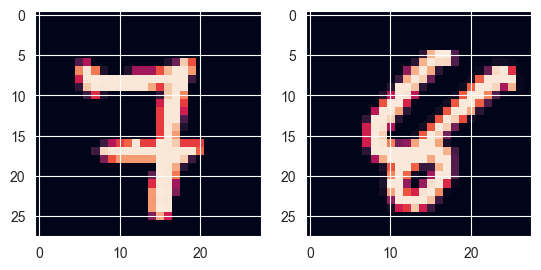

In [42]:
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

#### Chia train/test 0.7:0.3

In [55]:
n_samples = train_images.shape[0]
split_index = int(0.7 * n_samples)

X_train_raw = train_images[:split_index]
Y_train_raw = train_labels[:split_index]
X_test_raw = train_images[split_index:]
Y_test_raw = train_labels[split_index:]
X_train = np.concatenate((np.ones((1, X_train_raw.shape[0])), X_train_raw.T), axis=0)
X_test = np.concatenate((np.ones((1, X_test_raw.shape[0])), X_test_raw.T), axis=0)
Y_train = convert_labels(Y_train_raw, 10)
Y_test = convert_labels(Y_test_raw, 10)


(785, 3500)
(10, 3500)


<Figure size 640x480 with 0 Axes>

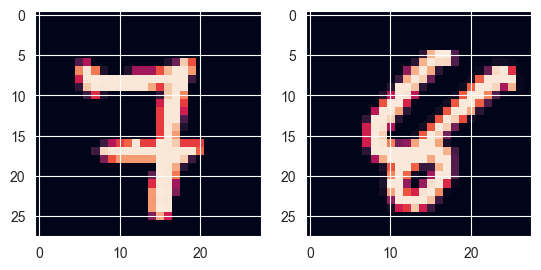

In [56]:
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [57]:
import time
start_train = time.time()

theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)

end_train = time.time()
train_time = end_train - start_train

Epoch 1/20 - Cost: 5.081329
Epoch 2/20 - Cost: 3.400413
Epoch 3/20 - Cost: 2.420901
Epoch 4/20 - Cost: 3.214952
Epoch 5/20 - Cost: 1.970827
Epoch 6/20 - Cost: 2.687967
Epoch 7/20 - Cost: 1.801088
Epoch 8/20 - Cost: 1.850377
Epoch 9/20 - Cost: 3.122864
Epoch 10/20 - Cost: 1.396741
Epoch 11/20 - Cost: 1.748202
Epoch 12/20 - Cost: 1.114233
Epoch 13/20 - Cost: 2.103219
Epoch 14/20 - Cost: 1.817250
Epoch 15/20 - Cost: 1.317516
Epoch 16/20 - Cost: 1.516422
Epoch 17/20 - Cost: 1.680654
Epoch 18/20 - Cost: 1.961587
Epoch 19/20 - Cost: 1.303392
Epoch 20/20 - Cost: 1.346042


In [58]:
train_pred = pred(opt_theta, X_train)
test_pred = pred(opt_theta, X_test)

print("Accuracy (training):", accuracy_score(Y_train_raw, train_pred))
print("Accuracy (testing):", accuracy_score(Y_test_raw, test_pred))
print("Training time: ", train_time)

Accuracy (training): 0.956
Accuracy (testing): 0.862
Training time:  8.319266319274902


### Dữ liệu đã qua giảm chiều

#### Giảm chiều toàn tập rồi chia train/test

In [60]:
X = (train_images - train_images.mean(axis=0)) / (train_images.std(axis=0, ddof=0) + 1e-8)
U, S, Vt = np.linalg.svd(X, full_matrices=False)
V_reduced = Vt[:100, :]         # (100, 784)
train_images = X.dot(V_reduced.T)  # (5000, 100)
print(train_images.shape)

(5000, 100)


In [61]:
n_samples = train_images.shape[0]
split_index = int(0.7 * n_samples)
X_train_raw = train_images[:split_index]
Y_train_raw = train_labels[:split_index]
X_test_raw = train_images[split_index:]
Y_test_raw = train_labels[split_index:]
X_train = np.concatenate((np.ones((1, X_train_raw.shape[0])), X_train_raw.T), axis=0)
X_test = np.concatenate((np.ones((1, X_test_raw.shape[0])), X_test_raw.T), axis=0)
Y_train = convert_labels(Y_train_raw, 10)
Y_test = convert_labels(Y_test_raw, 10)

In [63]:
import time
start_train = time.time()

theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)

end_train = time.time()
train_time = end_train - start_train

Epoch 1/20 - Cost: 2.034979
Epoch 2/20 - Cost: 1.824541
Epoch 3/20 - Cost: 1.661895
Epoch 4/20 - Cost: 1.536346
Epoch 5/20 - Cost: 1.438530
Epoch 6/20 - Cost: 1.361367
Epoch 7/20 - Cost: 1.299631
Epoch 8/20 - Cost: 1.249637
Epoch 9/20 - Cost: 1.208636
Epoch 10/20 - Cost: 1.174647
Epoch 11/20 - Cost: 1.146190
Epoch 12/20 - Cost: 1.122154
Epoch 13/20 - Cost: 1.101698
Epoch 14/20 - Cost: 1.084175
Epoch 15/20 - Cost: 1.069069
Epoch 16/20 - Cost: 1.055980
Epoch 17/20 - Cost: 1.044583
Epoch 18/20 - Cost: 1.034616
Epoch 19/20 - Cost: 1.025869
Epoch 20/20 - Cost: 1.018159


In [64]:
train_pred = pred(opt_theta, X_train)
test_pred = pred(opt_theta, X_test)

print("Accuracy (training):", accuracy_score(Y_train_raw, train_pred))
print("Accuracy (testing):", accuracy_score(Y_test_raw, test_pred))
print("Training time: ", train_time)

Accuracy (training): 0.8288571428571428
Accuracy (testing): 0.8173333333333334
Training time:  4.85401177406311


#### Chia train/test rồi mới giảm chiều

In [81]:
n_samples = train_images.shape[0]
split_index = int(0.7 * n_samples)
X_train_raw = train_images[:split_index]
Y_train_raw = train_labels[:split_index]
X_test_raw = train_images[split_index:]
Y_test_raw = train_labels[split_index:]
X_train = np.concatenate((np.ones((1, X_train_raw.shape[0])), X_train_raw.T), axis=0).T
X_test = np.concatenate((np.ones((1, X_test_raw.shape[0])), X_test_raw.T), axis=0).T
Y_train = convert_labels(Y_train_raw, 10)
Y_test = convert_labels(Y_test_raw, 10)

##### Giảm chiều X_train và X_test

In [82]:
X_train = (X_train - X_train.mean(axis=0)) / (X_train.std(axis=0, ddof=0) + 1e-8)
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)
V_reduced = Vt[:100, :]
X_train = X_train.dot(V_reduced.T)
print(X_train.shape)

(3500, 100)


In [84]:
X_test = (X_test - X_test.mean(axis=0)) / (X_test.std(axis=0, ddof=0) + 1e-8)
U, S, Vt = np.linalg.svd(X_test, full_matrices=False)
V_reduced = Vt[:100, :]
X_test = X_test.dot(V_reduced.T)
print(X_test.shape)

(1500, 100)


##### Train mô hình và đánh giá

In [87]:
import time
start_train = time.time()

theta = np.zeros((X_train.T.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train.T, Y_train, theta)

end_train = time.time()
train_time = end_train - start_train

Epoch 1/20 - Cost: 2.037831
Epoch 2/20 - Cost: 1.827945
Epoch 3/20 - Cost: 1.664383
Epoch 4/20 - Cost: 1.537193
Epoch 5/20 - Cost: 1.437743
Epoch 6/20 - Cost: 1.359086
Epoch 7/20 - Cost: 1.296084
Epoch 8/20 - Cost: 1.245095
Epoch 9/20 - Cost: 1.203303
Epoch 10/20 - Cost: 1.168722
Epoch 11/20 - Cost: 1.139811
Epoch 12/20 - Cost: 1.115447
Epoch 13/20 - Cost: 1.094750
Epoch 14/20 - Cost: 1.077061
Epoch 15/20 - Cost: 1.061841
Epoch 16/20 - Cost: 1.048674
Epoch 17/20 - Cost: 1.037223
Epoch 18/20 - Cost: 1.027227
Epoch 19/20 - Cost: 1.018459
Epoch 20/20 - Cost: 1.010742


In [89]:
train_pred = pred(opt_theta, X_train.T)
test_pred = pred(opt_theta, X_test.T)

print("Accuracy (training):", accuracy_score(Y_train_raw, train_pred))
print("Accuracy (testing):", accuracy_score(Y_test_raw, test_pred))
print("Training time: ", train_time)

Accuracy (training): 0.832
Accuracy (testing): 0.015333333333333332
Training time:  3.313542366027832


# Bài tập tự thực hành 4

## Sử dụng thư viện của OpenCV(cv2) để đọc tệp ảnh và lấy ra ma trận ứng với các điểm ảnh, rồi duỗi thẳng thành 1 vector số chiều D = height

In [121]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
# path to the database - change it if needed
path = r'C:\Users\DELL\OneDrive\Desktop\ML\Week4\yale\yalefaces_data\\'
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
'noglasses', 'normal', 'rightlight','sad',
'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png
# open one picture to get the image's size
fn = prefix + '01.' + states[0]
im = cv2.imread(path + fn, 0)
h = im.shape[0] # hight
w = im.shape[1] # width
D = h * w
N = len(states)*15
print(N, D, h, w)
X = np.zeros((D, N))
# collect all data
count = 0
for person_id in range(1, 16):
    for state in states:
        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state
        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
        # then add image to dataset X
        X[:, count] = tmp.reshape(D)
        count += 1

165 77760 243 320


## 1. Giảm số chiều dữ liệu xuống còn 135

In [108]:
X_mean = X.mean(axis=1, keepdims=True)
X_centered = X - X_mean
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
k = 135
U_reduced = U[:, :k]
S_reduced = S[:k]
Vt_reduced = Vt[:k, :]
X_reduced = np.dot(U_reduced.T, X_centered)
print("Dữ liệu sau giảm chiều:", X_reduced.shape)

Dữ liệu sau giảm chiều: (135, 165)


## 2. Áp dụng phương pháp phân loại nhiều lớp để phân loại, tỷ lệ train/test là 0.7:0.3

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [123]:
num_people = 15
num_states = len(states)

# Nhãn biểu cảm cho toàn bộ 165 ảnh
y_ = np.tile(np.arange(num_states), num_people)
# Nếu muốn tên biểu cảm
y_name = np.tile(states, num_people)

print(y_[:20])        # 0 1 2 ... 10 0 1 2 ...
print(y_name[:20])

[ 0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8]
['centerlight' 'glasses' 'happy' 'leftlight' 'noglasses' 'normal'
 'rightlight' 'sad' 'sleepy' 'surprised' 'wink' 'centerlight' 'glasses'
 'happy' 'leftlight' 'noglasses' 'normal' 'rightlight' 'sad' 'sleepy']


In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced.T, y, test_size=0.3, random_state=42, stratify=y
)

In [125]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (115, 135)
Test shape: (50, 135)


In [126]:
log_model = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
print("Accuracy (Multinomial Logistic Regression):", round(acc_log, 4))
print(classification_report(y_test, y_pred_log))

Accuracy (Multinomial Logistic Regression): 0.86
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.75      0.86         4
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         4
           8       0.57      1.00      0.73         4
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         4
          14       1.00      0.67      0.80         3
          15       1.00      0.33      0.50         3

    accuracy                           0.86        50
   macro avg       0.91      0.

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [127]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy (Naive Bayes):", round(acc_nb, 4))
print(classification_report(y_test, y_pred_nb))

Accuracy (Naive Bayes): 0.64
              precision    recall  f1-score   support

           1       0.21      1.00      0.35         3
           2       1.00      1.00      1.00         3
           3       1.00      0.33      0.50         3
           4       1.00      0.25      0.40         4
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.80      1.00      0.89         4
           8       0.50      0.75      0.60         4
           9       0.75      1.00      0.86         3
          10       1.00      0.33      0.50         3
          11       1.00      1.00      1.00         4
          12       0.33      0.33      0.33         3
          13       1.00      0.75      0.86         4
          14       1.00      0.33      0.50         3
          15       1.00      0.33      0.50         3

    accuracy                           0.64        50
   macro avg       0.84      0.63      0.64        

## 3. Coi toàn bộ 165 ảnh là train, tìm 5 ảnh bất ký rồi đưa về kích thước cũ, chân dung lệch sang tau phải theo hướng người nhìn, dùng mô hình đã huấn luyện chạy test 5 ảnh xem thuộc nhóm nào

### Lấy ra các labels

In [152]:
num_people = 15
num_states = len(states)

# Nhãn biểu cảm cho toàn bộ 165 ảnh
y_ = np.tile(np.arange(num_states), num_people)
# Nếu muốn tên biểu cảm
y_name = np.tile(states, num_people)

print(y_[:20])        # 0 1 2 ... 10 0 1 2 ...
print(y_name[:20])

[ 0  1  2  3  4  5  6  7  8  9 10  0  1  2  3  4  5  6  7  8]
['centerlight' 'glasses' 'happy' 'leftlight' 'noglasses' 'normal'
 'rightlight' 'sad' 'sleepy' 'surprised' 'wink' 'centerlight' 'glasses'
 'happy' 'leftlight' 'noglasses' 'normal' 'rightlight' 'sad' 'sleepy']


### Huấn luyện mô hình LogisticRegression

In [151]:
clf_log = LogisticRegression(max_iter=1000, multi_class='multinomial')
clf_log.fit(X.T, y)

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'multinomial'


### Lấy ra 5 ảnh bất kỳ

In [170]:
idx_test = np.random.choice(X.shape[1], 5, replace=False)

### Reshape về kích thước ban đầu và dịch phải

In [172]:
import cv2

X_new = []
for i in idx_test:
    img = X[:, i].reshape(h, w).astype(np.uint8)  # reshape về 2D

    # Dịch sang phải 40 pixel (theo hướng người nhìn)
    M = np.float32([[1, 0, 40], [0, 1, 0]])
    img_shifted = cv2.warpAffine(img, M, (w, h))

    X_new.append(img_shifted.flatten())  # flatten để dự đoán
X_new = np.array(X_new)  # shape (5, D)

(5, 77760)


### Thực hiện dữ đoán trên 5 ảnh 

In [155]:
y_pred_log = clf_log.predict(X_new)

### In ra kết quả dự đoán và kết quả thực tế

In [171]:
for i, idx in enumerate(idx_test):
    print(f"Ảnh cột {idx} → Logistic Regression dự đoán: {y_name[y_pred_log[i]]} || Nhãn thật: {y_name[y[idx]]}")

Ảnh cột 70 → Logistic Regression dự đoán: glasses || Nhãn thật: sad
Ảnh cột 142 → Logistic Regression dự đoán: glasses || Nhãn thật: happy
Ảnh cột 59 → Logistic Regression dự đoán: glasses || Nhãn thật: rightlight
Ảnh cột 31 → Logistic Regression dự đoán: leftlight || Nhãn thật: leftlight
Ảnh cột 15 → Logistic Regression dự đoán: normal || Nhãn thật: happy
